This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

# Let's see how "Quality" of Data Matters

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
%%time
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255


train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 0s 0us/step
CPU times: user 5.06 s, sys: 957 ms, total: 6.01 s
Wall time: 8.37 s


In [2]:
train_images.shape

(60000, 784)

In [3]:
train_images_with_noise_channels.shape

(60000, 1568)

In [4]:
train_images_with_noise_channels[0]

array([0.        , 0.        , 0.        , ..., 0.32235994, 0.13572248,
       0.42230579])

In [5]:
train_images_with_zeros_channels.shape

(60000, 1568)

In [6]:
train_images_with_zeros_channels[0]

array([0., 0., 0., ..., 0., 0., 0.])

**Training the same model on MNIST data with noise channels or all-zero channels**

In [8]:
%%time

NEPOCHS = 5
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history = model.fit(
    train_images, train_labels,
    epochs=NEPOCHS,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=NEPOCHS,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=NEPOCHS,
    batch_size=128,
    validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 2s 4ms/step - loss: 0.2970 - accuracy: 0.9144 - val_loss: 0.1534 - val_accuracy: 0.9560
Epoch 2/5
375/375 [==============================] - 1s 3ms/step - loss: 0.1248 - accuracy: 0.9629 - val_loss: 0.1158 - val_accuracy: 0.9678
Epoch 3/5
375/375 [==============================] - 1s 4ms/step - loss: 0.0807 - accuracy: 0.9766 - val_loss: 0.1067 - val_accuracy: 0.9691
Epoch 4/5
375/375 [==============================] - 1s 3ms/step - loss: 0.0582 - accuracy: 0.9829 - val_loss: 0.0831 - val_accuracy: 0.9758
Epoch 5/5
375/375 [==============================] - 1s 4ms/step - loss: 0.0439 - accuracy: 0.9870 - val_loss: 0.0757 - val_accuracy: 0.9790
Epoch 1/5
375/375 [==============================] - 3s 5ms/step - loss: 0.6138 - accuracy: 0.8130 - val_loss: 0.2653 - val_accuracy: 0.9225
Epoch 2/5
375/375 [==============================] - 2s 4ms/step - loss: 0.2574 - accuracy: 0.9202 - val_loss: 0.1894 - val_accuracy: 0.9457
Epoch 3/5
375

**Plotting a validation accuracy comparison**

CPU times: user 33.2 ms, sys: 0 ns, total: 33.2 ms
Wall time: 33.1 ms


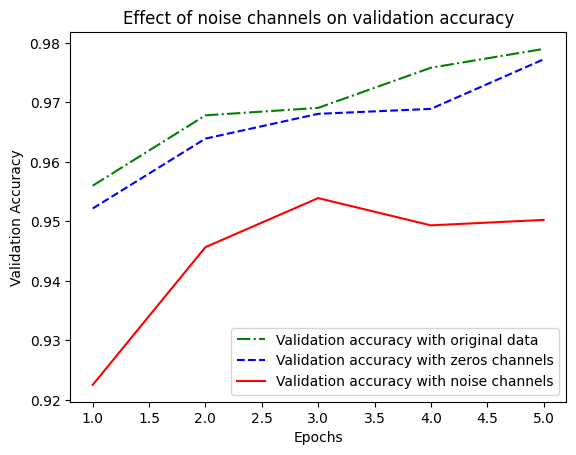

In [12]:
%%time
import matplotlib.pyplot as plt
val_acc_orig = history.history["val_accuracy"]
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, (NEPOCHS+1))

plt.plot(epochs, val_acc_orig, "g-.",
         label="Validation accuracy with original data")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.plot(epochs, val_acc_noise, "r-",
         label="Validation accuracy with noise channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [14]:
%%time

NEPS = 25
BATCH_SZ = 512

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(train_images, random_train_labels,
          epochs=NEPS,
          batch_size=BATCH_SZ,
          validation_split=0.2)

Epoch 1/25
94/94 [==============================] - 1s 7ms/step - loss: 2.3202 - accuracy: 0.1031 - val_loss: 2.3082 - val_accuracy: 0.1084
Epoch 2/25
94/94 [==============================] - 0s 4ms/step - loss: 2.2969 - accuracy: 0.1184 - val_loss: 2.3105 - val_accuracy: 0.0988
Epoch 3/25
94/94 [==============================] - 0s 5ms/step - loss: 2.2863 - accuracy: 0.1312 - val_loss: 2.3172 - val_accuracy: 0.1022
Epoch 4/25
94/94 [==============================] - 0s 4ms/step - loss: 2.2753 - accuracy: 0.1446 - val_loss: 2.3162 - val_accuracy: 0.1035
Epoch 5/25
94/94 [==============================] - 0s 4ms/step - loss: 2.2630 - accuracy: 0.1521 - val_loss: 2.3228 - val_accuracy: 0.0982
Epoch 6/25
94/94 [==============================] - 0s 4ms/step - loss: 2.2494 - accuracy: 0.1640 - val_loss: 2.3271 - val_accuracy: 0.1050
Epoch 7/25
94/94 [==============================] - 0s 4ms/step - loss: 2.2342 - accuracy: 0.1753 - val_loss: 2.3485 - val_accuracy: 0.1004
Epoch 8/25
94/94 [==

In [29]:
%%time
val_acc = history.history["val_accuracy"]
print(len(val_acc))


val_loss = history.history["val_loss"]
print(len(val_loss))

val_loss
# history.history

25
25
CPU times: user 1.81 ms, sys: 0 ns, total: 1.81 ms
Wall time: 1.74 ms


[2.308241605758667,
 2.3105368614196777,
 2.3171586990356445,
 2.31620717048645,
 2.322821617126465,
 2.3271164894104004,
 2.348517417907715,
 2.3468453884124756,
 2.3567304611206055,
 2.370302438735962,
 2.3769338130950928,
 2.384763240814209,
 2.4011833667755127,
 2.410507917404175,
 2.4235875606536865,
 2.4359850883483887,
 2.4457197189331055,
 2.4728097915649414,
 2.4858341217041016,
 2.5091257095336914,
 2.5280001163482666,
 2.5545291900634766,
 2.5468432903289795,
 2.5767641067504883,
 2.616004467010498]

CPU times: user 31.4 ms, sys: 1.83 ms, total: 33.3 ms
Wall time: 36.3 ms


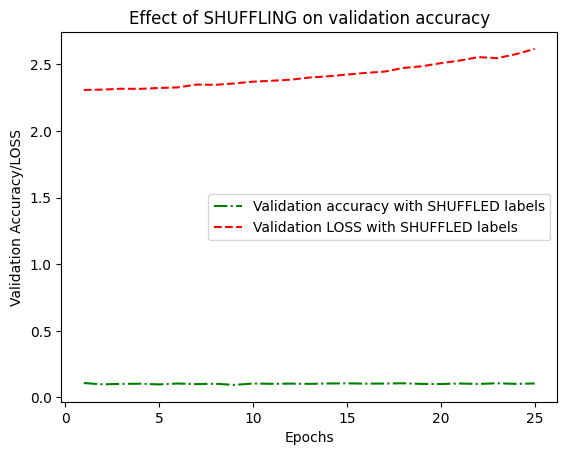

In [32]:
%%time
import matplotlib.pyplot as plt
val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]
epochs = range(1, (NEPS+1))

plt.plot(epochs, val_acc, "g-.",
         label="Validation accuracy with SHUFFLED labels")
plt.plot(epochs, val_loss, "r--",
         label="Validation LOSS with SHUFFLED labels")
plt.title("Effect of SHUFFLING on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy/LOSS")
plt.legend()

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [33]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 10ms/step - loss: 796.2311 - accuracy: 0.3389 - val_loss: 2.4674 - val_accuracy: 0.2598
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 2.6893 - accuracy: 0.2097 - val_loss: 2.4403 - val_accuracy: 0.2554
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 2.4990 - accuracy: 0.2172 - val_loss: 2.1141 - val_accuracy: 0.2278
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 2.4435 - accuracy: 0.2012 - val_loss: 2.2805 - val_accuracy: 0.1898
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 2.3005 - accuracy: 0.2059 - val_loss: 2.1069 - val_accuracy: 0.2541
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.2521 - accuracy: 0.2156 - val_loss: 2.1579 - val_accuracy: 0.2076
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3200 - accuracy: 0.2111 - val_loss: 2.2627 - val_accuracy: 0.1949
Epo

**The same model with a more appropriate learning rate**

In [34]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3402 - accuracy: 0.9127 - val_loss: 0.1516 - val_accuracy: 0.9585
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1276 - accuracy: 0.9646 - val_loss: 0.1302 - val_accuracy: 0.9669
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1001 - accuracy: 0.9738 - val_loss: 0.1690 - val_accuracy: 0.9647
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0862 - accuracy: 0.9782 - val_loss: 0.1841 - val_accuracy: 0.9660
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0715 - accuracy: 0.9823 - val_loss: 0.2071 - val_accuracy: 0.9631
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0630 - accuracy: 0.9856 - val_loss: 0.1602 - val_accuracy: 0.9735
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0571 - accuracy: 0.9875 - val_loss: 0.1899 - val_accuracy: 0.9734
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [38]:
%%time
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6682 - accuracy: 0.8377 - val_loss: 0.3584 - val_accuracy: 0.9029
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3528 - accuracy: 0.9028 - val_loss: 0.3076 - val_accuracy: 0.9151
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3178 - accuracy: 0.9111 - val_loss: 0.2919 - val_accuracy: 0.9173
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3020 - accuracy: 0.9159 - val_loss: 0.2829 - val_accuracy: 0.9226
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2923 - accuracy: 0.9186 - val_loss: 0.2785 - val_accuracy: 0.9222
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2858 - accuracy: 0.9206 - val_loss: 0.2734 - val_accuracy: 0.9262
Epoch 7/20
375/375 [==============================] - 2s 4ms/step - loss: 0.2808 - accuracy: 0.9218 - val_loss: 0.2721 - val_accuracy: 0.9256
Epoch 

In [39]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
model.weights

[<tf.Variable 'dense_22/kernel:0' shape=(784, 10) dtype=float32, numpy=
 array([[ 0.01231328,  0.08259266, -0.02686347, ..., -0.01477626,
         -0.07045332,  0.07638737],
        [ 0.00916862,  0.03543693, -0.01085143, ..., -0.0065509 ,
          0.01088772,  0.06041843],
        [ 0.00601732, -0.04936075, -0.04209194, ...,  0.07296393,
         -0.02179854,  0.01381445],
        ...,
        [ 0.07911309, -0.00393789,  0.07077666, ..., -0.05339414,
          0.00863599,  0.0017453 ],
        [ 0.02944767, -0.01906118,  0.06281399, ...,  0.00299919,
         -0.07470336,  0.0071958 ],
        [-0.08457107, -0.03058334, -0.01448741, ..., -0.07066222,
         -0.01402722, -0.0130737 ]], dtype=float32)>,
 <tf.Variable 'dense_22/bias:0' shape=(10,) dtype=float32, numpy=
 array([-0.5121241 ,  0.55743235,  0.10210676, -0.35601455,  0.0691886 ,
         1.2011241 , -0.22897455,  0.65787256, -1.3093133 , -0.30257934],
       dtype=float32)>]

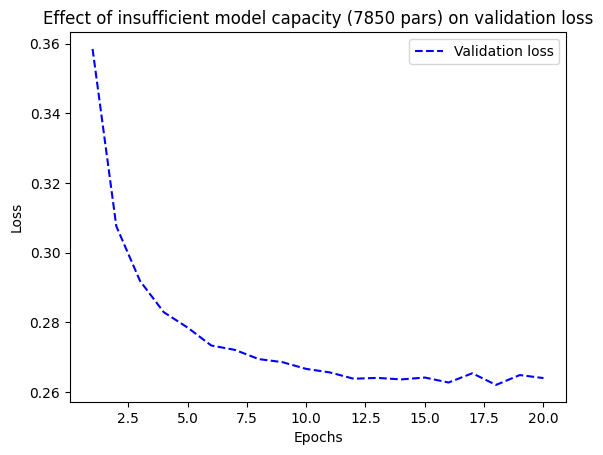

In [43]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity (7850 pars) on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [44]:
%%time
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 4ms/step - loss: 0.3729 - accuracy: 0.8955 - val_loss: 0.1891 - val_accuracy: 0.9466
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1646 - accuracy: 0.9518 - val_loss: 0.1450 - val_accuracy: 0.9567
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1156 - accuracy: 0.9651 - val_loss: 0.1131 - val_accuracy: 0.9671
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0885 - accuracy: 0.9730 - val_loss: 0.1045 - val_accuracy: 0.9688
Epoch 5/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0713 - accuracy: 0.9783 - val_loss: 0.0959 - val_accuracy: 0.9715
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0586 - accuracy: 0.9824 - val_loss: 0.1036 - val_accuracy: 0.9703
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0490 - accuracy: 0.9852 - val_loss: 0.0966 - val_accuracy: 0.9739
Epoch 

In [45]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 96)                75360     
                                                                 
 dense_24 (Dense)            (None, 96)                9312      
                                                                 
 dense_25 (Dense)            (None, 10)                970       
                                                                 
Total params: 85642 (334.54 KB)
Trainable params: 85642 (334.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


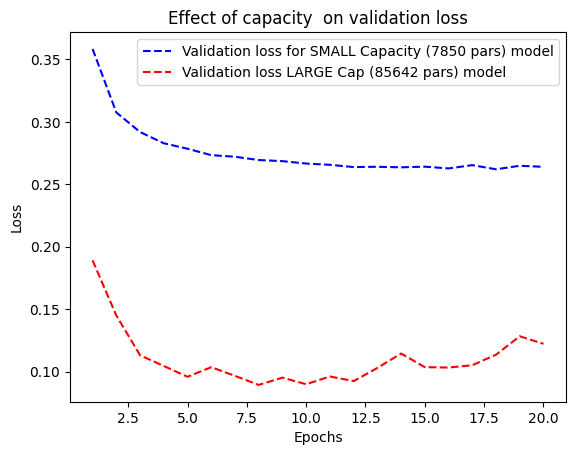

In [51]:
import matplotlib.pyplot as plt
val_loss_small = history_small_model.history["val_loss"]
val_loss_big = history_large_model.history["val_loss"]

epochs = range(1, 21)
plt.plot(epochs, val_loss_small, "b--", label="Validation loss for SMALL Capacity (7850 pars) model")
plt.plot(epochs, val_loss_big, "r--", label="Validation loss LARGE Cap (85642 pars) model")
plt.title("Effect of capacity  on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [54]:
%%time
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 68ms/step - loss: 0.5205 - accuracy: 0.7898 - val_loss: 0.3948 - val_accuracy: 0.8676
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3262 - accuracy: 0.8935 - val_loss: 0.3147 - val_accuracy: 0.8867
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2463 - accuracy: 0.9188 - val_loss: 0.2865 - val_accuracy: 0.8901
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2005 - accuracy: 0.9321 - val_loss: 0.2760 - val_accuracy: 0.8920
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1668 - accuracy: 0.9455 - val_loss: 0.3118 - val_accuracy: 0.8757
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1413 - accuracy: 0.9563 - val_loss: 0.3232 - val_accuracy: 0.8735
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1197 - accuracy: 0.9629 - val_loss: 0.3278 - val_accuracy: 0.8761
Epoch 8/20
30

**Version of the model with lower capacity**

In [1]:
%%time
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

NameError: ignored

**Version of the model with higher capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

## Summary